# 1. *Business Understanding*

The objective of this project is to apply exploratory analysis and regression techniques to identify which features affect home prices the most in the Melbourne Housing Market.

# 2. *Data Understanding*

## 2.1  Import

In [1]:
# Import libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Read data
dataset = pd.read_csv('Melbourne_housing_FULL.csv')

In [3]:
# Number of rows and columns
print(dataset.shape)



(34857, 21)


## 2.2 View

In [4]:
# View first few records
dataset.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
dataset.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

## 2.3 Variable Type 


### 2.3.1 Categorical Variables
Based on the information, the following variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' will need to be specified as categories rather than general objects.   

In addition, the Date variable will need to be converted to a date object.

In [7]:
# View data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [8]:
# Identify object columns
print(dataset.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [9]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']

for colname in obj_cats:
    dataset[colname] = dataset[colname].astype('category')  

In [10]:
# Convert to date object
dataset['Date'] = pd.to_datetime(dataset['Date'])

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  float64       
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

### 2.3.2 Numeric Variables
A statistical summary of the numeric variables above indicates that Postcode is being treated as numeric when it should be identified as categorical.  This feature will need to be converted to the correct data type.

In [12]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bedroom2,26640.0,3.084647e+00,0.980690,0.00000,2.00000,3.0000,4.000000e+00,3.000000e+01
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03


In [13]:
# Convert numeric variables to categorical
num_cats = ['Postcode']  

for colname in num_cats:
    dataset[colname] = dataset[colname].astype('category')   

# Confirm changes
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bedroom2       26640 non-null  float64       
 11  Bathroom       26631 non-null  float64       
 12  Car            26129 non-null  float64       
 13  Landsize       23047 non-null  float64       
 14  BuildingArea   13742 non-null  float64       
 15  YearBuilt      1555

# 3. *Data Preparation : Data Cleaning*

## 3.1 Duplicate Variables
According to dataset documentation, 'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources. 

In [14]:
# Examine Rooms v Bedroom2
dataset['Rooms v Bedroom2'] = dataset['Rooms'] - dataset['Bedroom2']
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,...,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,0.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,...,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,0.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,...,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,0.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,...,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0,NaN


The differences between these variables are minimal so keeping both would only be duplicating information.  Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.  



In [15]:
# Drop columns
dataset = dataset.drop(['Bedroom2','Rooms v Bedroom2'],1)


In [16]:
dataset

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,2018-02-24,6.3,3013.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,2018-02-24,6.3,3013.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,2018-02-24,6.3,3013.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,2018-02-24,6.3,3013.0,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


Earlier there are 22 columns but after removing duplicate data, column reduced to 20.

# 4. *Feature Engineering*

## 4.1 Missing Data

Based on a quick look at the number of entries for each variable, there appears to be missing information in the dataset. 
I will explore which features are missing the most information.

In [17]:
# Number of entries
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         34857 non-null  category      
 1   Address        34857 non-null  category      
 2   Rooms          34857 non-null  int64         
 3   Type           34857 non-null  category      
 4   Price          27247 non-null  float64       
 5   Method         34857 non-null  category      
 6   SellerG        34857 non-null  category      
 7   Date           34857 non-null  datetime64[ns]
 8   Distance       34856 non-null  float64       
 9   Postcode       34856 non-null  category      
 10  Bathroom       26631 non-null  float64       
 11  Car            26129 non-null  float64       
 12  Landsize       23047 non-null  float64       
 13  BuildingArea   13742 non-null  float64       
 14  YearBuilt      15551 non-null  float64       
 15  CouncilArea    3485

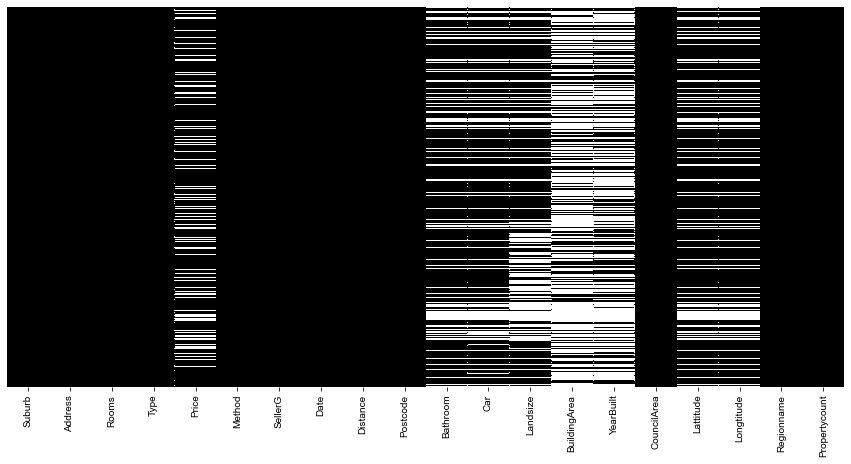

In [18]:
# Visualize missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(dataset.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [19]:
# Count of missing values
dataset.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [20]:
# Percentage of missing values
dataset.isnull().sum()/len(dataset)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset.  

In [21]:
# "Address","Date","Postcode","Lattitude","Longtitude","Date" is also useless for our Data
dataset.drop(["Address","Date","Postcode","Lattitude","Longtitude","Date"], axis=1,inplace=True)
dataset.dropna(inplace=True)

In [22]:
# ReCount of missing values
dataset.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Regionname       0
Propertycount    0
dtype: int64

## 4.2 Outliers

To determine the validity of provided data.

In [23]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8895.0,3.098820e+00,0.963590,1.0,2.0,3.0,4.0,12.0
Price,8895.0,1.092524e+06,679206.610965,131000.0,640500.0,900000.0,1345000.0,9000000.0
Distance,8895.0,1.120214e+01,6.815113,0.0,6.4,10.2,13.9,47.4
Bathroom,8895.0,1.646655e+00,0.721388,1.0,1.0,2.0,2.0,9.0
Car,8895.0,1.692636e+00,0.975393,0.0,1.0,2.0,2.0,10.0
Landsize,8895.0,5.233952e+02,1060.940841,0.0,212.0,478.0,652.0,42800.0
BuildingArea,8895.0,1.492957e+02,87.898565,0.0,100.0,132.0,180.0,3112.0
YearBuilt,8895.0,1.965777e+03,37.055054,1196.0,1945.0,1970.0,2000.0,2019.0
Propertycount,8895.0,7.473779e+03,4374.181898,249.0,4380.0,6567.0,10331.0,21650.0


In [24]:
dataset[dataset['BuildingArea']==0]

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
7211,North Melbourne,2,t,841000.0,S,Jellis,2.3,1.0,1.0,215.0,0.0,2000.0,Melbourne City Council,Northern Metropolitan,6821.0
19775,Balwyn North,5,h,1950000.0,S,RT,9.7,3.0,2.0,743.0,0.0,1949.0,Boroondara City Council,Southern Metropolitan,7809.0
19840,Bundoora,3,h,814000.0,S,Barry,12.1,1.0,2.0,542.0,0.0,1970.0,Banyule City Council,Northern Metropolitan,10175.0
20223,Roxburgh Park,4,h,570000.0,S,Raine,20.6,2.0,2.0,504.0,0.0,2000.0,Hume City Council,Northern Metropolitan,5833.0
20262,Thornbury,3,t,900000.0,VB,Jellis,7.0,2.0,2.0,120.0,0.0,2000.0,Darebin City Council,Northern Metropolitan,8870.0
22040,Prahran,3,h,1390000.0,S,Marshall,4.6,2.0,1.0,125.0,0.0,2002.0,Stonnington City Council,Southern Metropolitan,7717.0
22507,Huntingdale,3,h,1205000.0,SA,FN,12.3,2.0,4.0,622.0,0.0,1960.0,Monash City Council,Southern Metropolitan,768.0
22931,Balwyn North,5,h,2800000.0,S,Marshall,9.7,2.0,2.0,1173.0,0.0,1960.0,Boroondara City Council,Southern Metropolitan,7809.0
22994,Brighton East,3,h,1650000.0,SP,Buxton,10.3,2.0,2.0,623.0,0.0,1920.0,Bayside City Council,Southern Metropolitan,6938.0
23022,Bundoora,4,h,815000.0,S,Ray,12.1,2.0,1.0,525.0,0.0,1965.0,Banyule City Council,Northern Metropolitan,10175.0


In [25]:
dataset[dataset['Landsize']==0]

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
25,Abbotsford,2,u,750000.0,S,Biggin,2.5,2.0,1.0,0.0,94.00,2009.0,Yarra City Council,Northern Metropolitan,4019.0
42,Abbotsford,2,u,500000.0,S,Collins,2.5,1.0,1.0,0.0,60.00,1970.0,Yarra City Council,Northern Metropolitan,4019.0
57,Abbotsford,1,u,470000.0,S,Nelson,2.5,1.0,1.0,0.0,50.00,2013.0,Yarra City Council,Northern Metropolitan,4019.0
67,Airport West,3,h,730000.0,VB,Nelson,13.5,2.0,1.0,0.0,145.00,1965.0,Moonee Valley City Council,Western Metropolitan,3464.0
68,Airport West,3,h,770000.0,SP,Nelson,13.5,2.0,1.0,0.0,145.00,1965.0,Moonee Valley City Council,Western Metropolitan,3464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19678,South Yarra,2,u,570000.0,VB,Ray,2.7,1.0,1.0,0.0,64.00,1965.0,Melbourne City Council,Southern Metropolitan,14887.0
19685,St Kilda,2,u,600000.0,VB,hockingstuart,5.0,1.0,1.0,0.0,82.00,1930.0,Port Phillip City Council,Southern Metropolitan,13240.0
19710,Tullamarine,2,u,300000.0,SP,Jason,12.9,1.0,1.0,0.0,66.32,1980.0,Brimbank City Council,Western Metropolitan,3296.0
19734,Williamstown,1,u,385000.0,SP,Williams,6.8,1.0,1.0,0.0,35.64,1967.0,Hobsons Bay City Council,Western Metropolitan,6380.0


In [26]:
# Remove outlier
dataset = dataset[dataset['BuildingArea']!=0]

# Confirm removal
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8850.0,3.096723e+00,0.963875,1.0,2.0,3.0,4.0,12.0
Price,8850.0,1.092175e+06,678934.267439,131000.0,641000.0,900000.0,1345000.0,9000000.0
Distance,8850.0,1.118968e+01,6.812718,0.0,6.4,10.2,13.9,47.4
Bathroom,8850.0,1.645989e+00,0.722081,1.0,1.0,2.0,2.0,9.0
Car,8850.0,1.692203e+00,0.976591,0.0,1.0,2.0,2.0,10.0
Landsize,8850.0,5.228903e+02,1062.211928,0.0,211.0,476.5,652.0,42800.0
BuildingArea,8850.0,1.500548e+02,87.472988,1.0,100.0,132.0,180.0,3112.0
YearBuilt,8850.0,1.965716e+03,37.071556,1196.0,1945.0,1970.0,2000.0,2019.0
Propertycount,8850.0,7.469414e+03,4373.655873,249.0,4380.0,6567.0,10331.0,21650.0


# 5 *Exploratory Analysis*

## 5.1 Univariate   
The dependent (or target) variable we are trying to predict in this analysis is Price.  This variable appears to be normally distributed and skewed to the right.  That is, the majority of homes around 900k with some outliers around  8M.

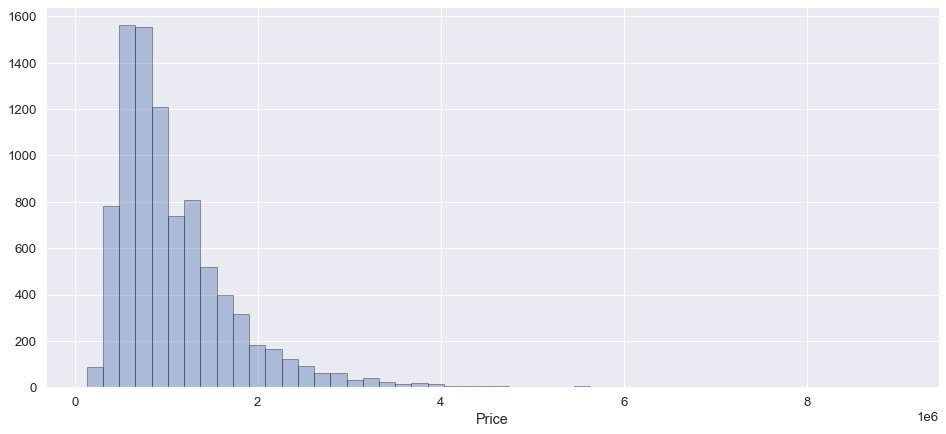

In [27]:
plt.figure(figsize=(16,7))
sns.distplot(dataset['Price'], kde = False,hist_kws=dict(edgecolor="k"))

## 5.2 Bivariate 

### 5.2.1 Categorical Features
Relationships between the target variable and the categorical features.   

In [28]:
# Identify categorical features
dataset.select_dtypes(['category']).columns

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')

In [29]:
# Abbreviate Regionname categories
dataset['Regionname'] = dataset['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

<ipython-input-29-42548970a47c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Regionname'] = dataset['Regionname'].map({'Northern Metropolitan':'N Metro',


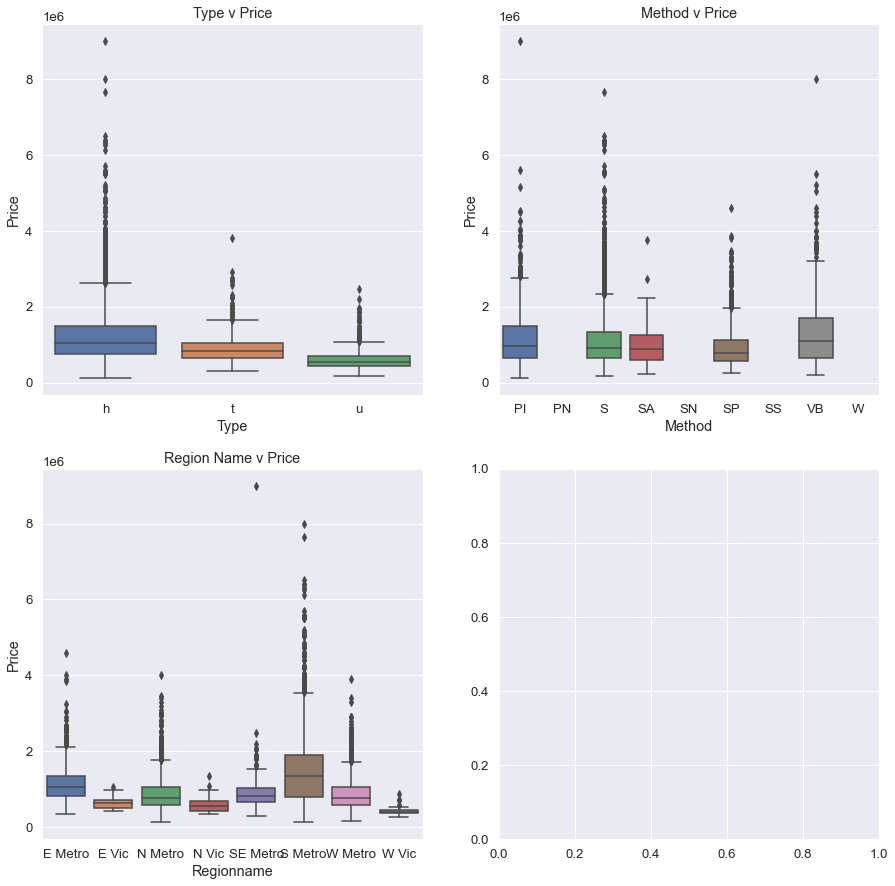

In [30]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = dataset, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = dataset, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = dataset, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]


plt.show()

### 5.2.2 Numeric Features
 visualize the relationships between numeric features in the dataset and price.  

In [31]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

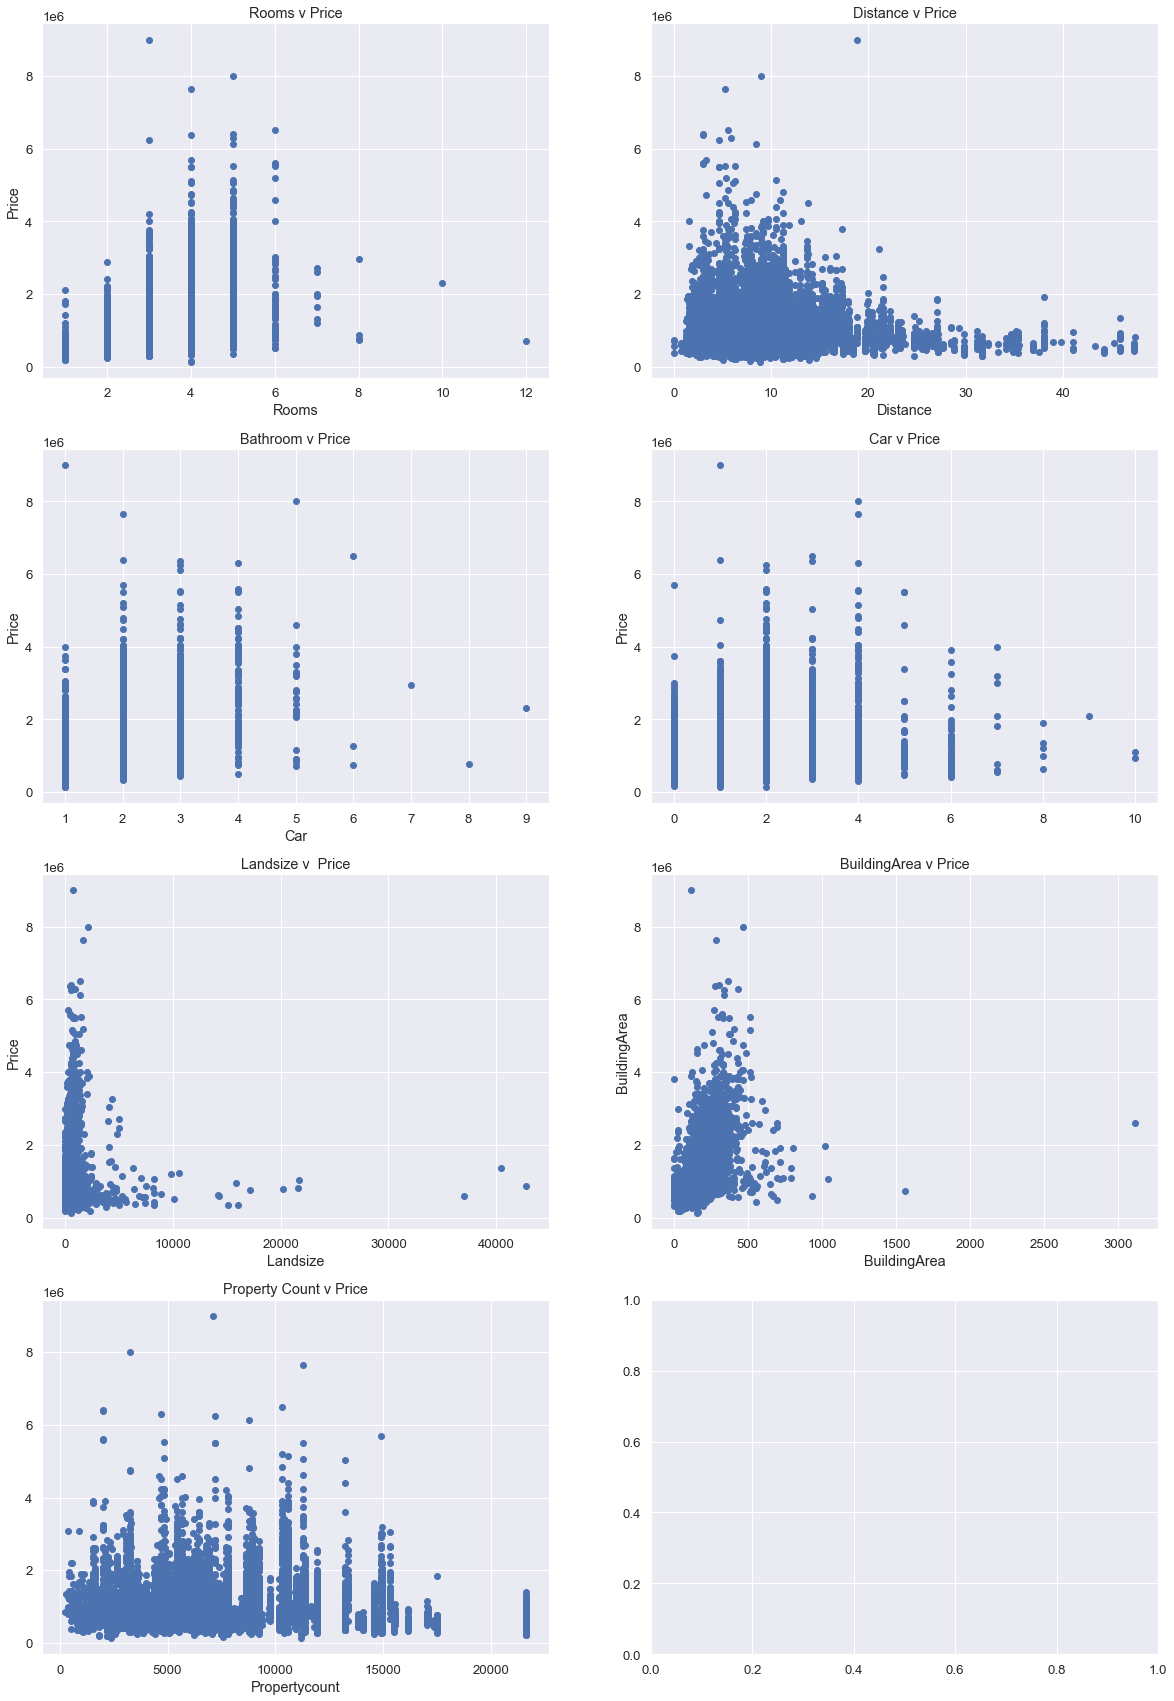

In [32]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = dataset, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = dataset, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = dataset, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]


axes[3,0].scatter(x = 'Propertycount', y = 'Price', data = dataset, edgecolor = 'b')
axes[3,0].set_xlabel('Propertycount')
axes[3,0].set_title('Property Count v Price')

plt.show()

In [33]:
pd.set_option('display.max_columns', None)

dataset

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,N Metro,4019.0
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,N Metro,4019.0
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,N Metro,4019.0
11,Abbotsford,3,h,1876000.0,S,Nelson,2.5,2.0,0.0,245.0,210.0,1910.0,Yarra City Council,N Metro,4019.0
14,Abbotsford,2,h,1636000.0,S,Nelson,2.5,1.0,2.0,256.0,107.0,1890.0,Yarra City Council,N Metro,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,Wollert,3,h,500000.0,PI,Ray,25.5,2.0,2.0,383.0,118.0,2016.0,Whittlesea City Council,N Metro,2940.0
34849,Wollert,3,h,570000.0,SP,RW,25.5,2.0,2.0,404.0,158.0,2012.0,Whittlesea City Council,N Metro,2940.0
34853,Yarraville,2,h,888000.0,SP,Sweeney,6.3,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,W Metro,6543.0
34854,Yarraville,2,t,705000.0,S,Jas,6.3,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,W Metro,6543.0


## 5.3  Correlation
How Variables are correlated with one another?

Text(0.5, 1.0, 'Variable Correlation')

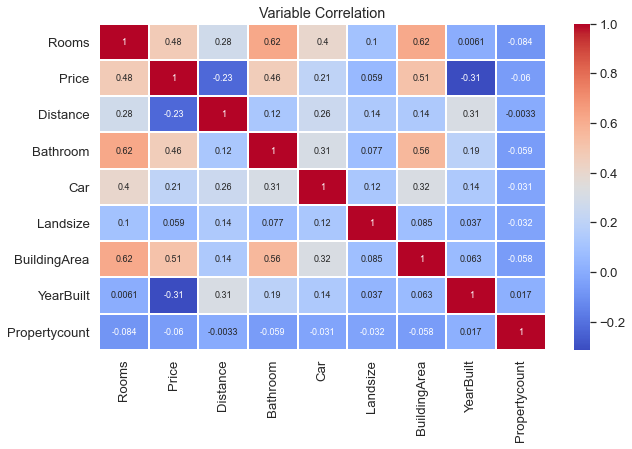

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(dataset.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

# 6. *Data Pre-processing*

### Categorical Data

In [35]:
X_cat = dataset.select_dtypes(['category']).columns
X_cat

Index(['Suburb', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname'], dtype='object')

In [36]:
X_cat.shape

(6,)

In [37]:
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  


In [38]:
dataset['Suburb']= label_encoder.fit_transform(dataset['Suburb'])
dataset['Type']= label_encoder.fit_transform(dataset['Type'])
dataset['Method']= label_encoder.fit_transform(dataset['Method'])
dataset['SellerG']= label_encoder.fit_transform(dataset['SellerG'])
dataset['Regionname']= label_encoder.fit_transform(dataset['Regionname'])
dataset['CouncilArea']= label_encoder.fit_transform(dataset['CouncilArea'])

<ipython-input-38-d1b2bd74de97>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Suburb']= label_encoder.fit_transform(dataset['Suburb'])
<ipython-input-38-d1b2bd74de97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['Type']= label_encoder.fit_transform(dataset['Type'])
<ipython-input-38-d1b2bd74de97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

In [39]:
dataset.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
2,0,2,0,1035000.0,1,22,2.5,1.0,0.0,156.0,79.0,1900.0,31,2,4019.0
4,0,3,0,1465000.0,3,22,2.5,2.0,0.0,134.0,150.0,1900.0,31,2,4019.0
6,0,4,0,1600000.0,4,147,2.5,1.0,2.0,120.0,142.0,2014.0,31,2,4019.0
11,0,3,0,1876000.0,1,147,2.5,2.0,0.0,245.0,210.0,1910.0,31,2,4019.0
14,0,2,0,1636000.0,1,147,2.5,1.0,2.0,256.0,107.0,1890.0,31,2,4019.0


### Numerical Data

In [40]:
X_num = dataset.select_dtypes(['float64','int64'])
X_num

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
2,2,1035000.0,2.5,1.0,0.0,156.0,79.0,1900.0,4019.0
4,3,1465000.0,2.5,2.0,0.0,134.0,150.0,1900.0,4019.0
6,4,1600000.0,2.5,1.0,2.0,120.0,142.0,2014.0,4019.0
11,3,1876000.0,2.5,2.0,0.0,245.0,210.0,1910.0,4019.0
14,2,1636000.0,2.5,1.0,2.0,256.0,107.0,1890.0,4019.0
...,...,...,...,...,...,...,...,...,...
34847,3,500000.0,25.5,2.0,2.0,383.0,118.0,2016.0,2940.0
34849,3,570000.0,25.5,2.0,2.0,404.0,158.0,2012.0,2940.0
34853,2,888000.0,6.3,2.0,1.0,98.0,104.0,2018.0,6543.0
34854,2,705000.0,6.3,1.0,2.0,220.0,120.0,2000.0,6543.0


In [41]:
X_num.shape

(8850, 9)

# 7. *Model Building*

In [42]:
# Train test split
X = dataset.drop(['Price'], axis = 1)
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=500)

### Linear Regression 

In [43]:
# Identify numeric features
dataset.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Propertycount'],
      dtype='object')

In [44]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train,y_train)

LinearRegression()

In [45]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 746668.65362827, 1003644.3873141 , 1042433.7986287 , ...,
        967301.48444644,  558481.98442966,  745471.64306521])

### **Regression Evaluation Metrics**  
Three common evaluation metrics for regression problems:  
1. Mean Absolute Error (MAE)  
2. Mean Squared Error (MSE)  
3. Root Mean Squared Error (RMSE)  

Comparing these metrics:  

**MAE** is the easiest to understand, because it's the average error.   
**MSE**  more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.   
**RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .   

 


In [46]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 300611.0434421746
MSE: 204676822931.42065
RMSE: 452412.22677047603


RMSE tells us explicitly  how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are \$508,212.42 away from the actual value.

In [47]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.5305851017366708


According to the R-squared,  47.6% of the variance in the dependent variable is explained by the model. 

### **Analyze the Residuals**

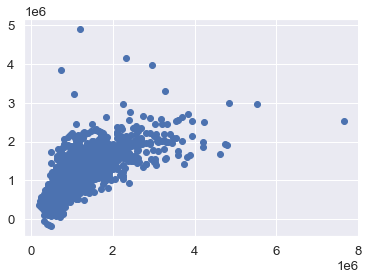

In [48]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)

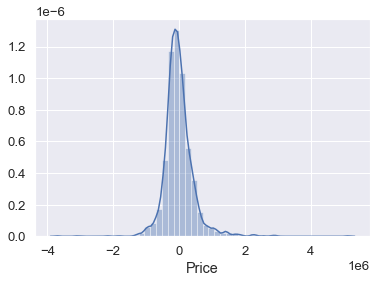

In [49]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))

###  Interpreting the Cofficients

In [50]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Suburb,-491.567539
Rooms,90130.684299
Type,-78683.779349
Method,-1432.449130
SellerG,-149.801830
Distance,-29891.466136
Bathroom,260373.914869
Car,43928.049293
Landsize,21.756046
BuildingArea,2143.641760


# **CONCLUSION**

Every one unit increase in:
- **Rooms** is associated with an increase in Price by 	\$90,130.684299  
- **Distance** is associated with a *decrease* in Price by \$29,891.466136 
- **Bathroom** is associated with an increase in Price by \$260,373.914869  
- **Car** space is associated with an increase in Price by \$43,928.049293  
- **Landsize**  is associated with an increase in Price by \$21.756046  
- **BuildingArea**  is associated with an increase in Price by \$2,143.641760  
- **Propertycount** is associated with a* increase* in Price by \$1.435645 
 